# System Model V3 - Debt Market Model - Ideal Parameters

The purpose of this notebook is to simulate a single run of the full CDP and APT system model, using a stochastic Ethereum price and liquidity demand process as a driver.


We want to run a basic simuluation in order to serve as a sanity check. We want the simulation to have no liquidity shocks, the controller off, arbitrageur considers the liquidation ratio, and target price scaling. The market price presented should be stable and should reflect the movement and volatility of the realized sample path of the ETH price

In order to test this, configure the following experiment [ideal_params.py](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/ideal_params.py). Run run this simulation, we create a directory in the ```experiments/system_model_v3``` called ```ideal_params/```,and add a ```logs/``` directory inside of it.

Assuming our we have all of the requirements required (run requirements.txt from the ```reflexer/``` root directory to be sure. Assuming our terminal is in the root directory, we run the follow to run the simulation:

```bash
cd experiments/system_model_v3
python3 -m experiments.system_model_v3.ideal_params
```
And our simulation will run. The resulting [run log](https://github.com/BlockScience/reflexer/blob/experiment-analysis/experiments/system_model_v3/ideal_params/experiment_run_log.md)
 can be found in the ```experiments/system_model_v3/ideal_params/``` directory, along with the simulation results stored as ```experiment_results.hdf5```


Below we will import and examine the simulation results.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [2]:
os.getcwd()

'/home/aclarkdata/repos/reflexer/notebooks/analysis'

In [3]:
os.chdir('../../')
os.getcwd()

'/home/aclarkdata/repos/reflexer'

In [4]:
experiment_results = 'experiments/system_model_v3/unstable_controller_params/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-02-25T16:31:21.440728']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]#'results_2021-02-09T18:46:33.073363' # Or select last result: experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-02-25T16:31:21.440728'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
548,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1972800,2017-01-23 20:00:00,0,269.679092,-158.454286,-2438.513461,...,713065.728736,1.088430e+06,8.460103e+06,None,0,0,1,18,548,NaN
549,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1976400,2017-01-23 21:00:00,0,269.040158,38.117326,-1200.198067,...,572352.354125,1.356827e+06,8.460103e+06,None,0,0,1,18,549,NaN
550,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1980000,2017-01-23 22:00:00,0,270.922056,-90.791248,-645.494658,...,414449.491864,1.874730e+06,8.458761e+06,None,0,0,1,18,550,NaN
551,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1983600,2017-01-23 23:00:00,0,270.397041,-0.089513,-322.792085,...,289257.034579,2.688567e+06,8.458759e+06,None,0,0,1,18,551,NaN
552,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1987200,2017-01-24 00:00:00,0,269.510165,-2.113868,-162.452976,...,148153.386622,5.256828e+06,8.458697e+06,<models.system_model_v3.model.parts.uniswap_or...,0,0,1,18,552,NaN


## Post process

In [8]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.unstable_controller_params import params, SIMULATION_TIMESTEPS

In [9]:
df = post_process_results(df_raw, params, set_params=['ki', 'kp', 'liquidation_ratio'])
df

Adding new columns
0.08173727989196777
Getting parameter sweep
0.08185076713562012
Assigning parameters to subsets
0.10019969940185547
Creating target_price_scaled
0.10518646240234375


,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,run,substep,timestep,events,eth_collateral_value,collateralization_ratio,ki,kp,liquidation_ratio,target_price_scaled
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1.000000,1.000000,...,1,0,0,NaN,4.553000e+07,1.450000,5.000000e-09,-2.000000e-07,1.45,4.553000
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,3600,2017-01-01 01:00:00,0,291.208252,906.674484,453.837242,...,1,18,1,NaN,4.508705e+07,1.435893,5.000000e-09,-2.000000e-07,1.45,3.140000
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,7200,2017-01-01 02:00:00,0,292.287792,-326.024615,63.906314,...,1,18,2,NaN,3.142197e+07,1.455375,5.000000e-09,-2.000000e-07,1.45,3.140000
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,10800,2017-01-01 03:00:00,0,289.343698,209.658450,136.782382,...,1,18,3,NaN,3.110547e+07,1.435395,5.000000e-09,-2.000000e-07,1.45,3.140000
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,14400,2017-01-01 04:00:00,0,286.827771,-79.844839,28.468771,...,1,18,4,NaN,3.083500e+07,1.437392,5.000000e-09,-2.000000e-07,1.45,3.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1972800,2017-01-23 20:00:00,0,269.679092,-158.454286,-2438.513461,...,1,18,548,NaN,2.899146e+07,1.381799,5.000000e-09,-2.000000e-07,1.45,10.166369
549,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1976400,2017-01-23 21:00:00,0,269.040158,38.117326,-1200.198067,...,1,18,549,NaN,2.892277e+07,1.369758,5.000000e-09,-2.000000e-07,1.45,10.736432
550,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1980000,2017-01-23 22:00:00,0,270.922056,-90.791248,-645.494658,...,1,18,550,NaN,2.912508e+07,1.382615,5.000000e-09,-2.000000e-07,1.45,11.338461
551,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,1983600,2017-01-23 23:00:00,0,270.397041,-0.089513,-322.792085,...,1,18,551,NaN,2.906864e+07,1.370350,5.000000e-09,-2.000000e-07,1.45,11.974247


# Simulation Analysis

In [10]:
df.substep.unique()

array([ 0, 18])

In [11]:
df.subset.unique()

array([0])

In [12]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_dripped',
       'interest_wiped', 'interest_bitten', 'w_1', 'w_2', 'w_3',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price', 'error_star',
       'error_star_integral', 'market_slippage', 'RAI_balance', 'ETH_balance',
       'UNI_supply', 'uniswap_oracle', 'simulation', 'subset', 'run',
       'substep', 'timestep', 'events', 'eth_collateral_value',
       'collateralization_ratio', 'ki', 'kp', 'liquidation_ratio',
       'target_price_scaled'],
      dtype='object')

### Generate key plots for analysis

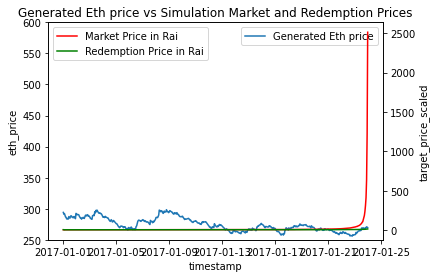

In [13]:
sns.lineplot(data=df,x="timestamp", y="eth_price",label='Generated Eth price')
plt.ylim(250, 600)
ax2 = plt.twinx()
sns.lineplot(data=df,x="timestamp", y="market_price",ax=ax2,color='r',label='Market Price in Rai')
sns.lineplot(data=df,x="timestamp", y="target_price_scaled",ax=ax2,color='g',label='Redemption Price in Rai')
plt.title('Generated Eth price vs Simulation Market and Redemption Prices')
plt.legend(loc="upper left")
plt.savefig('experiments/system_model_v3/unstable_controller_params/ideal_params.png')

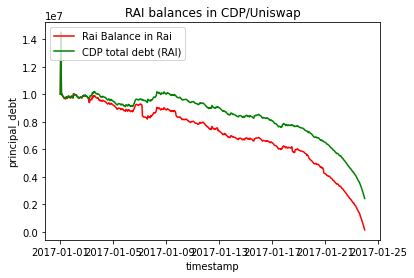

In [14]:
sns.lineplot(data=df,x="timestamp", y="RAI_balance",color='r',label='Rai Balance in Rai')
sns.lineplot(data=df,x="timestamp", y="principal_debt",color='g',label='CDP total debt (RAI)')
plt.title('RAI balances in CDP/Uniswap')
plt.legend(loc="upper left")
plt.savefig('experiments/system_model_v3/unstable_controller_params/RAI_balances_in_CDPUniswap.png')

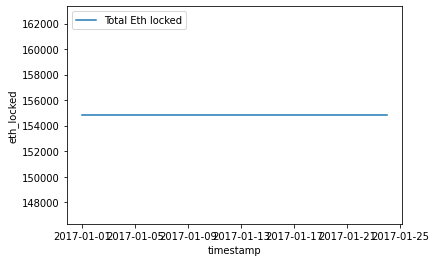

In [15]:
sns.lineplot(data=df,x="timestamp", y="eth_locked",label='Total Eth locked')
plt.legend(loc="upper left")
plt.show()

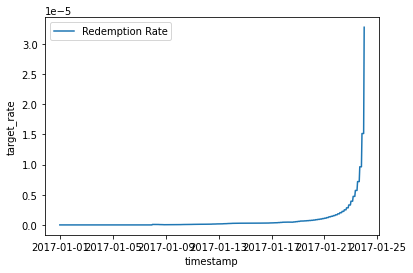

In [16]:
sns.lineplot(data=df,x="timestamp", y="target_rate",label='Redemption Rate')
plt.legend(loc="upper left")
plt.show()

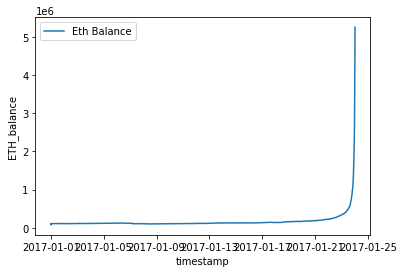

In [17]:
sns.lineplot(data=df,x="timestamp", y="ETH_balance",label='Eth Balance')
plt.legend(loc="upper left")
plt.show()

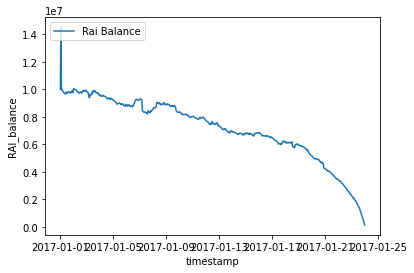

In [18]:
sns.lineplot(data=df,x="timestamp", y="RAI_balance",label='Rai Balance')
plt.legend(loc="upper left")
plt.show()

## Conclusion